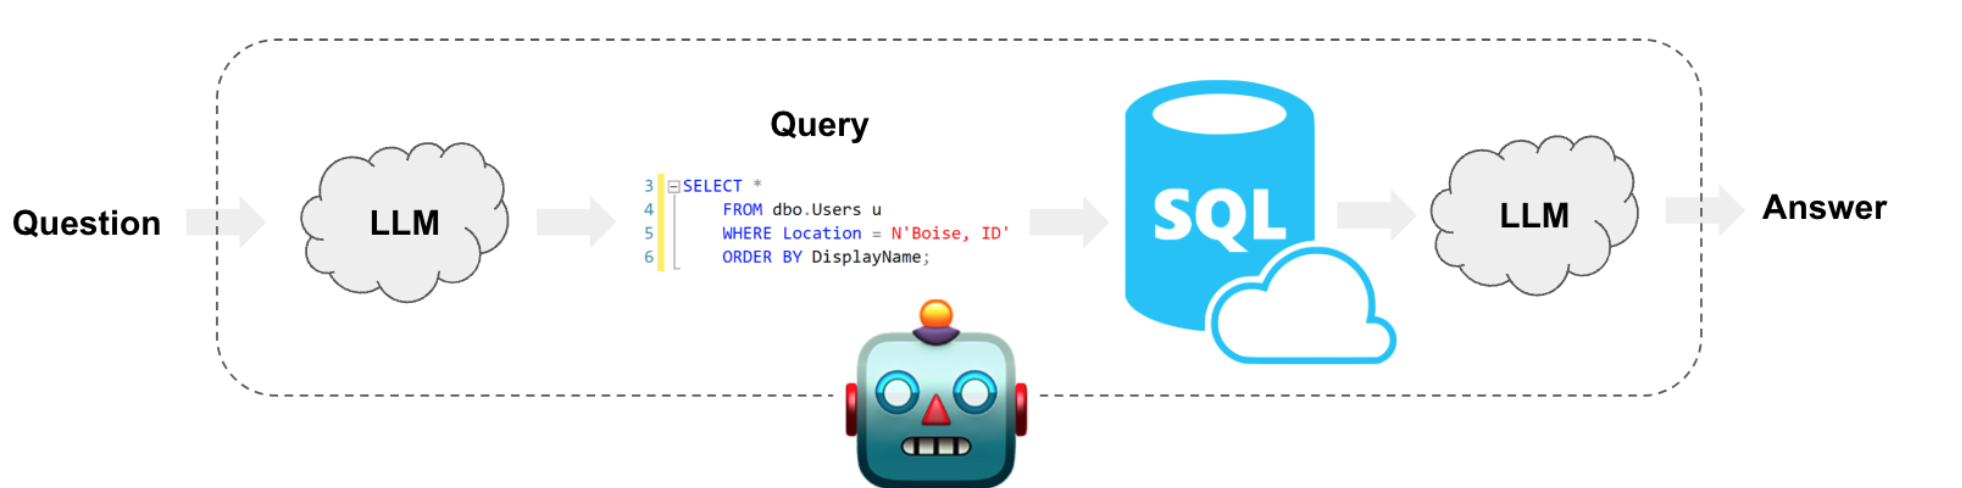
Source: https://python.langchain.com/docs/use_cases/qa_structured/sql

In [6]:
# create db
import sqlite3,pandas
con = sqlite3.connect("../datasets/sample.db")
TOP_TRENDING_BOOKS='../datasets/top100books/Top-100 Trending Books.csv'
df = pandas.read_csv(TOP_TRENDING_BOOKS)
df.to_sql('TOP_TRENDING_BOOKS', con, if_exists='replace', index=True)

100

In [10]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('TOP_TRENDING_BOOKS',)]


1. sqlite3 sample.db 
2. .databases
3. .tables
4. select * from TOP_TRENDING_BOOKS limit 5;
. PRAGMA table_info(TOP_TRENDING_BOOKS);
select * from TOP_TRENDING_BOOKS where genre like '%child%' limit 5;
 

In [14]:
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain
db = SQLDatabase.from_uri("sqlite:///../datasets/sample.db")

In [18]:
from dotenv import load_dotenv
load_dotenv()

True

In [20]:
llm = OpenAI(temperature=0, verbose=True)
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)

In [22]:
run_response_1=db_chain.run("How many books are there for childeren?")



> Entering new SQLDatabaseChain chain...
How many books are there for childeren?
SQLQuery:SELECT COUNT(*) FROM TOP_TRENDING_BOOKS WHERE genre = 'Children';
SQLResult: [(0,)]
Answer:There are 0 books for children.
> Finished chain.


In [23]:
run_response_1

'There are 0 books for children.'

In [25]:
query="How many books are there for child, do similar search "
db_chain.run(query)



> Entering new SQLDatabaseChain chain...
How many books are there for child, do similar search 
SQLQuery:SELECT COUNT(*) FROM TOP_TRENDING_BOOKS WHERE genre LIKE '%child%';
SQLResult: [(32,)]
Answer:There are 32 books for children.
> Finished chain.


'There are 32 books for children.'

In [26]:
db_chain.invoke(query)



> Entering new SQLDatabaseChain chain...
How many books are there for child, do similar search 
SQLQuery:SELECT COUNT(*) FROM TOP_TRENDING_BOOKS WHERE genre LIKE '%child%';
SQLResult: [(32,)]
Answer:There are 32 books for children.
> Finished chain.


{'query': 'How many books are there for child, do similar search ',
 'result': 'There are 32 books for children.'}

In [29]:
# return only SQL, i.e dont run the command
db_chain.return_sql=True
db_chain.invoke(query)



> Entering new SQLDatabaseChain chain...
How many books are there for child, do similar search 
SQLQuery:
> Finished chain.


{'query': 'How many books are there for child, do similar search ',
 'result': "SELECT COUNT(*) FROM TOP_TRENDING_BOOKS WHERE genre LIKE '%child%';"}

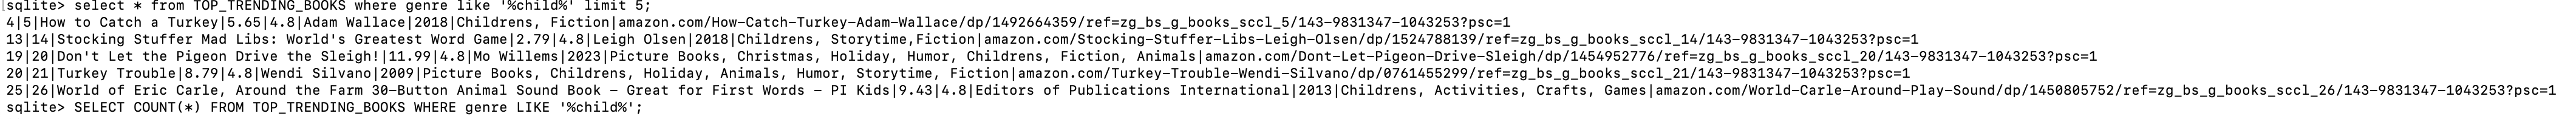

# <font color=red> create delete SQL </font>

In [32]:
query_to_delete="Delete all the  fiction books,i.e contain fiction , more like regex"
db_chain.invoke(query_to_delete)



> Entering new SQLDatabaseChain chain...
Delete all the  fiction books,i.e contain fiction , more like regex
SQLQuery:
> Finished chain.


{'query': 'Delete all the  fiction books,i.e contain fiction , more like regex',
 'result': 'DELETE FROM "TOP_TRENDING_BOOKS" WHERE genre LIKE \'%Fiction%\';'}